# <b>Category B: Intermediate</b>
## <b>Task 01: Brain Tumor Segmentation with YOLO 11 and SAM2</b>
This project involves using advanced computer vision techniques to perform brain tumor
segmentation using YOLO 11 and SAM2 models.

<b>Overview:</b>

• YOLO 11 - A state-of-the-art real-time object detection model that identifies multiple objects in an image with high speed and accuracy.

• SAM2 (Segment Anything Model 2) - A segmentation model designed for precise
object separation in an image.

• Segmentation - The process of partitioning an image into meaningful regions to
detect and analyze objects.

## Installing Required Libraries

In [1]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

## Importing Required Libraries

In [9]:
from ultralytics import YOLO
from ultralytics import SAM
from roboflow import Roboflow
from google.colab import userdata
import os
# from PIL import Image

## Importing Data

In [3]:
rf = Roboflow(api_key=userdata.get('RoboflowAPI'))
project = rf.workspace("brain-tumor-jolxi").project("brain-tumor-detection-o0ggc")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to brain-tumor-detection-2 in yolov11:: 100%|██████████| 1146/1146 [00:00<00:00, 3748.44it/s]


## Defining Model

In [4]:
yolo_model = YOLO("yolo11n.pt")
sam_model = SAM("sam2_b.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


100%|██████████| 154M/154M [00:01<00:00, 128MB/s]


## Training Model

In [14]:
data_path = "/content/brain-tumor-detection-2/data.yaml" # Replace the path with your actual data path
if os.path.exists(data_path):
  print("Data path exists. proceeding...")
else:
  print("Data path does not exist.")
trainResults = yolo_model.train(
    data = data_path,
    epochs = 20,
    imgsz = 640, # Set the image size according your data
    device = "0" # Replace 0 with cpu if GPU is not available
)

Data path exists. proceeding...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/brain-tumor-detection-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

100%|██████████| 755k/755k [00:00<00:00, 21.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs

Transferred 79/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1267.7±383.4 MB/s, size: 39.3 KB)


train: Scanning /content/brain-tumor-detection-2/train/labels... 397 images, 2 backgrounds, 0 corrupt: 100%|██████████| 397/397 [00:00<00:00, 2488.37it/s]

train: New cache created: /content/brain-tumor-detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 624.9±564.8 MB/s, size: 49.6 KB)


val: Scanning /content/brain-tumor-detection-2/valid/labels... 114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 948.85it/s]

val: New cache created: /content/brain-tumor-detection-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.28G      2.825      4.417      2.625         27        640: 100%|██████████| 25/25 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        114        161    0.00167      0.354    0.00258   0.000653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.68G      2.387      3.091      2.079         26        640: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]

                   all        114        161    0.00421      0.894     0.0519     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.7G      2.212      2.358      1.867         35        640: 100%|██████████| 25/25 [00:07<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        114        161      0.687      0.634      0.682      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.71G      2.125      2.109       1.78         34        640: 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        114        161      0.728      0.699      0.666      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.72G      2.075      1.896      1.746         39        640: 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        114        161      0.774       0.72      0.759        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.74G      2.071      1.813      1.722         18        640: 100%|██████████| 25/25 [00:07<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        114        161      0.927      0.862      0.867      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.76G      2.096      1.725      1.738         26        640: 100%|██████████| 25/25 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        114        161      0.876      0.857       0.85      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.77G      1.987      1.608      1.663         31        640: 100%|██████████| 25/25 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]

                   all        114        161      0.831       0.87      0.823      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.78G      1.974      1.558      1.655         33        640: 100%|██████████| 25/25 [00:07<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]

                   all        114        161      0.723      0.845      0.828      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.8G      1.931      1.477      1.649         30        640: 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        114        161      0.767      0.845      0.863      0.375


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.81G      1.941      1.429      1.695         17        640: 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        114        161      0.861      0.876      0.861      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.83G      1.937      1.291      1.656         19        640: 100%|██████████| 25/25 [00:07<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        114        161      0.918      0.901      0.921      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.84G      1.957      1.269      1.668         19        640: 100%|██████████| 25/25 [00:06<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        114        161      0.929      0.891      0.913        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.86G      1.925       1.26      1.642         18        640: 100%|██████████| 25/25 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        114        161      0.919      0.894      0.883      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.87G       1.87      1.199      1.608         20        640: 100%|██████████| 25/25 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        114        161      0.914      0.913      0.912      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.89G      1.866      1.144       1.62         19        640: 100%|██████████| 25/25 [00:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all        114        161       0.93      0.919      0.918      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.9G      1.825      1.098       1.59         17        640: 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]

                   all        114        161      0.919      0.913      0.924      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.92G      1.847      1.134      1.586         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        114        161      0.915      0.933      0.933      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.93G      1.834      1.101      1.595         19        640: 100%|██████████| 25/25 [00:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all        114        161      0.909      0.932      0.936      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.95G      1.799      1.086      1.588         19        640: 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        114        161      0.927      0.925      0.937      0.442



20 epochs completed in 0.047 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]


                   all        114        161      0.919      0.919      0.935      0.441
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train


## Loading the Trained Model

In [15]:
yolo_model = YOLO("/content/runs/detect/train/weights/best.pt")


image 1/1 /content/brain-tumor-detection-2/test/images/Brain-Tumor-Overview_mp4-0474_jpg.rf.6ad8c1d252799c1566a203ce25f3dd35.jpg: 640x640 1 tumor, 62.5ms
Speed: 2.5ms preprocess, 62.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


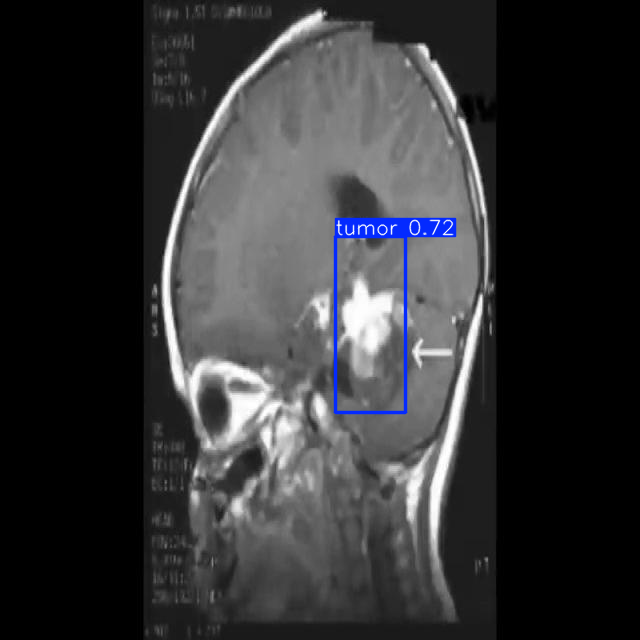

Results saved to runs/segment/predict


In [21]:
results = yolo_model("/content/brain-tumor-detection-2/test/images/Brain-Tumor-Overview_mp4-0474_jpg.rf.6ad8c1d252799c1566a203ce25f3dd35.jpg")
results[0].show()

for result in results:
  class_ids = result.boxes.cls.int().tolist()
  if len(class_ids):
    boxes = result.boxes.xyxy
    sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, device="cpu", save=True, show=False)
